In [61]:
library(haven)
library(lavaan)
library(psych)
library(semTools)
library(stdmod)

In [2]:
setwd("C://Users//jihan//Downloads")
data_location <- "Kenny BC Survey_allCovid_v2.sav"

raw_data <- read_sav(data_location)
dt <- cbind(raw_data$CovidStatus,raw_data$SSS,raw_data$SES,raw_data$TotEBarRacGen,raw_data$TotCBarRacGen,
            raw_data$TotEBarRac,raw_data$TotBelong,raw_data$TotRelatCommCol,
            raw_data$WoVol1,raw_data$WoVol2,raw_data$WoVol3,raw_data$WoVol4,
            raw_data$WoVol5,raw_data$WoVol6,raw_data$WoVol7,
            raw_data$TotEBarFin,raw_data$TotWoVol,raw_data$TotEngage)
dt_new <- matrix(0,nrow=nrow(dt),ncol=ncol(dt))
for (i in 1:nrow(dt)){
    for (j in 1:ncol(dt)){
        dt_new[i,j] <- as.numeric(dt[i,j])
    }
}
dt <- dt_new
colnames(dt) <- c('CovidStatus','SSS','SES','TotEBarRacGen','TotCBarRacGen','TotEBarRac','TotBelong','TotRelatCommCol',
                  'WoVol1','WoVol2','WoVol3','WoVol4','WoVol5','WoVol6','WoVol7','TotEBarFin','TotWoVol','TotEngage')
dt<-as.data.frame(dt)

In [4]:
model <- '
  economic_constraints  =~ TotEBarFin + SSS
  marginalization =~ TotEBarRacGen + TotCBarRacGen
  work_volition =~ TotWoVol
  school_engagement =~ TotEngage

  economic_constraints ~~ work_volition + school_engagement
  marginalization ~~ work_volition + school_engagement
'

# Estimate the model parameters
fit <- sem(model, data = dt)

# View the model results
summary(fit,fit.measures=TRUE,standardized=TRUE,rsquare=TRUE)

lavaan 0.6-11 ended normally after 96 iterations

  Estimator                                         ML
  Optimization method                           NLMINB
  Number of model parameters                        16
                                                      
                                                  Used       Total
  Number of observations                           747         748
                                                                  
Model Test User Model:
                                                      
  Test statistic                                32.221
  Degrees of freedom                                 5
  P-value (Chi-square)                           0.000

Model Test Baseline Model:

  Test statistic                               991.026
  Degrees of freedom                                15
  P-value                                        0.000

User Model versus Baseline Model:

  Comparative Fit Index (CFI)                    0.972
 

In [5]:
inspect(fit)

$lambda
              ecnmc_ mrgnlz wrk_vl schl_n
TotEBarFin         0      0      0      0
SSS                1      0      0      0
TotEBarRacGen      0      0      0      0
TotCBarRacGen      0      2      0      0
TotWoVol           0      0      0      0
TotEngage          0      0      0      0

$theta
              TtEBrF SSS TtEBRG TtCBRG TotWVl TtEngg
TotEBarFin     7                                    
SSS            0      8                             
TotEBarRacGen  0      0   9                         
TotCBarRacGen  0      0   0     10                  
TotWoVol       0      0   0      0      0           
TotEngage      0      0   0      0      0      0    

$psi
                     ecnmc_ mrgnlz wrk_vl schl_n
economic_constraints 11                         
marginalization      15     12                  
work_volition         3      5     13           
school_engagement     4      6     16     14

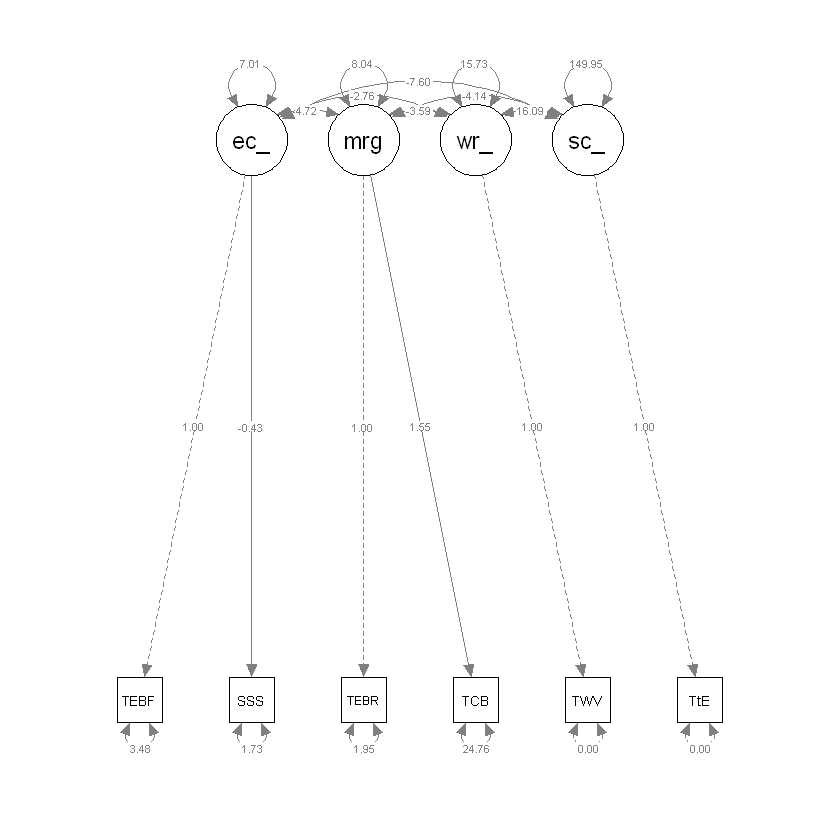

In [12]:
library(semPlot)
semPaths(object = fit,whatLabels = "est",layout='tree')

In [13]:
model0 <- '
  economic_constraints  =~ TotEBarFin + SSS
  work_volition =~ TotWoVol

  work_volition ~ economic_constraints
'

# Estimate the model parameters
fit0 <- sem(model0, data = dt)

# View the model results
summary(fit0, fit.measures=TRUE)

lavaan 0.6-11 ended normally after 89 iterations

  Estimator                                         ML
  Optimization method                           NLMINB
  Number of model parameters                         6
                                                      
                                                  Used       Total
  Number of observations                           747         748
                                                                  
Model Test User Model:
                                                      
  Test statistic                                 0.000
  Degrees of freedom                                 0

Model Test Baseline Model:

  Test statistic                               291.099
  Degrees of freedom                                 3
  P-value                                        0.000

User Model versus Baseline Model:

  Comparative Fit Index (CFI)                    1.000
  Tucker-Lewis Index (TLI)                       1.000



In [14]:
inspect(fit0)

$lambda
           ecnmc_ wrk_vl
TotEBarFin      0      0
SSS             1      0
TotWoVol        0      0

$theta
           TtEBrF SSS TotWVl
TotEBarFin 3                
SSS        0      4         
TotWoVol   0      0   0     

$psi
                     ecnmc_ wrk_vl
economic_constraints 5            
work_volition        0      6     

$beta
                     ecnmc_ wrk_vl
economic_constraints      0      0
work_volition             2      0

In [34]:
model1 <- '
  economic_constraints  =~ TotEBarFin + SSS
  work_volition =~ TotWoVol
  college_support =~ TotRelatCommCol

  # Direct effect of mediator on IV
  work_volition ~ a*economic_constraints

  # Indirect effect of IV on DV through the mediator
  work_volition ~ b*college_support
  college_support ~ c*economic_constraints
'

# Estimate the model parameters
fit1 <- sem(model1, data = dt)

# View the model results
summary(fit1 ,fit.measures=TRUE)

lavaan 0.6-11 ended normally after 82 iterations

  Estimator                                         ML
  Optimization method                           NLMINB
  Number of model parameters                         9
                                                      
                                                  Used       Total
  Number of observations                           747         748
                                                                  
Model Test User Model:
                                                      
  Test statistic                                 2.104
  Degrees of freedom                                 1
  P-value (Chi-square)                           0.147

Model Test Baseline Model:

  Test statistic                               411.074
  Degrees of freedom                                 6
  P-value                                        0.000

User Model versus Baseline Model:

  Comparative Fit Index (CFI)                    0.997
 

In [16]:
# Define a function to calculate the indirect effect
indirect <- function(fit, dt) {
  # Extract the path coefficients from the model fit
  path.coef <- coef(fit)
  # Calculate the indirect effect using the path coefficients
  indirect.effect <- path.coef['c'] * path.coef['b']
  return(indirect.effect)
}
indirect(fit1, dt)

c 
-0.1430868

In [17]:
# Sobel test
c = .121    
Sc = 0.017
b = -1.185          
Sb = 0.177
z = b*c / sqrt(c^2 * Sb^2 + b^2 * Sc^2)
pnorm(z)

[1] 5.395932e-07

In [67]:
model2 <- '
  economic_constraints  =~ TotEBarFin + SSS
  TotWoVol ~ TotRelatCommCol + economic_constraints + TotRelatCommCol:economic_constraints
'

# Estimate the model parameters
fit2 <- sem(model2, data = na.omit(dt))

# View the model results
summary(fit2 ,fit.measures=TRUE)

Warning message in lav_model_vcov(lavmodel = lavmodel, lavsamplestats = lavsamplestats, :
"lavaan WARNING:
    Could not compute standard errors! The information matrix could
    not be inverted. This may be a symptom that the model is not
    identified."


lavaan 0.6-11 ended normally after 48 iterations

  Estimator                                         ML
  Optimization method                           NLMINB
  Number of model parameters                        10
                                                      
  Number of observations                           747
                                                      
Model Test User Model:
                                                      
  Test statistic                                    NA
  Degrees of freedom                                -1
  P-value (Unknown)                                 NA

User Model versus Baseline Model:

  Comparative Fit Index (CFI)                       NA
  Tucker-Lewis Index (TLI)                          NA

Loglikelihood and Information Criteria:

  Loglikelihood user model (H0)              -5324.414
  Loglikelihood unrestricted model (H1)      -5295.322
                                                      
  Akaike (AIC)          

In [68]:
inspect(fit2)

,economic_constraints,TotRelatCommCol:economic_constraints,TotWoVol,TotRelatCommCol
TotEBarFin,0,0,0,0
SSS,1,0,0,0
TotWoVol,0,0,0,0
TotRelatCommCol,0,0,0,0
,TotEBarFin,SSS,TotWoVol,TotRelatCommCol
TotEBarFin,5,0,0,0
SSS,0,6,0,0
TotWoVol,0,0,0,0
TotRelatCommCol,0,0,0,0
,economic_constraints,TotRelatCommCol:economic_constraints,TotWoVol,TotRelatCommCol


In [58]:
data(test_mod1)
max(test_mod1$dv)

[1] 24.41815

In [47]:
round(head(test_mod1, 3), 3)

,dv,iv,mod,med,cov1,cov2
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,23.879,-0.133,-0.544,10.310,-0.511,-0.574
2,23.096,1.456,1.539,11.384,0.094,-0.264
3,23.201,0.319,1.774,9.615,-0.172,0.488


In [52]:
mod <-
"
med ~ iv + mod + iv:mod
"
fit <- sem(mod, test_mod1, fixed.x = FALSE)
summary(fit)

lavaan 0.6-11 ended normally after 1 iterations

  Estimator                                         ML
  Optimization method                           NLMINB
  Number of model parameters                        10
                                                      
  Number of observations                           300
                                                      
Model Test User Model:
                                                      
  Test statistic                                 0.000
  Degrees of freedom                                 0

Parameter Estimates:

  Standard errors                             Standard
  Information                                 Expected
  Information saturated (h1) model          Structured

Regressions:
                   Estimate  Std.Err  z-value  P(>|z|)
  med ~                                               
    iv                0.220    0.031    7.031    0.000
    mod               0.097    0.030    3.181    0.001
    iv:mod 